# Analysis of selected funds

In [1]:
import feather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import sparse

In [35]:
# Convert to date format
begin_date = '2010-01-01' 
end_date   = '2017-12-31'

In [36]:
path = '../data/processed/holdings_summary_s.feather'
info_df = feather.read_dataframe(path)

In [37]:
info_df = info_df[(info_df.report_dt >= begin_date) & (info_df.report_dt <= end_date)]

In [38]:
info_df[['lipper_class','cap_class','style_class']] = info_df[['lipper_class','cap_class','style_class']].astype('category')

In [39]:
info_df.shape

(150224, 9)

## Number of unique port_nos and fund_nos

In [40]:
info_df.sample(1)

,port_no,report_dt,fund_name,avrcs,lipper_class,False,cap_class,style_class,fund_no
117363,1026985,2010-06-30,"T Rowe Price Diversified Mid-Cap Growth Fund, Inc",97.914833,MCGE,LCVE,M,G,27061


In [41]:
info_df.dtypes

port_no                  int64
report_dt       datetime64[ns]
fund_name               object
avrcs                  float64
lipper_class          category
False                   object
cap_class             category
style_class           category
fund_no                  int64
dtype: object

In [42]:
info_df['report_dt'].describe()

count                  150224
unique                    100
top       2010-09-30 00:00:00
freq                     2635
first     2010-01-30 00:00:00
last      2017-12-31 00:00:00
Name: report_dt, dtype: object

In [43]:
print(info_df['port_no'].nunique())
print(info_df['fund_no'].nunique())

3507
3493


## Number of unique funds per year

#### Something seems odd
Break in 2009 not clear

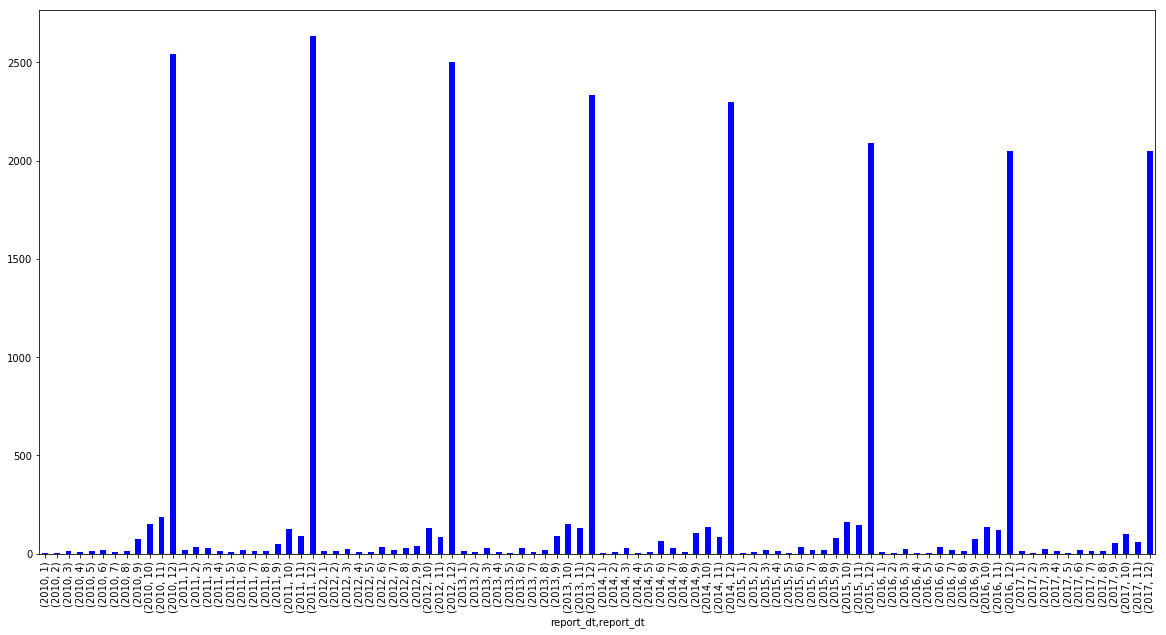

In [95]:
# Analysis of selected funds

## Distribution by date(info_df["report_dt"]
(info_df["port_no"]
    .groupby([
         info_df["report_dt"].dt.year,
         info_df["report_dt"].dt.month
     ])
     .nunique()
     .plot(kind="bar",
           color = 'b',
           figsize=(20,10)))

## Distribution by number of observations per fund 

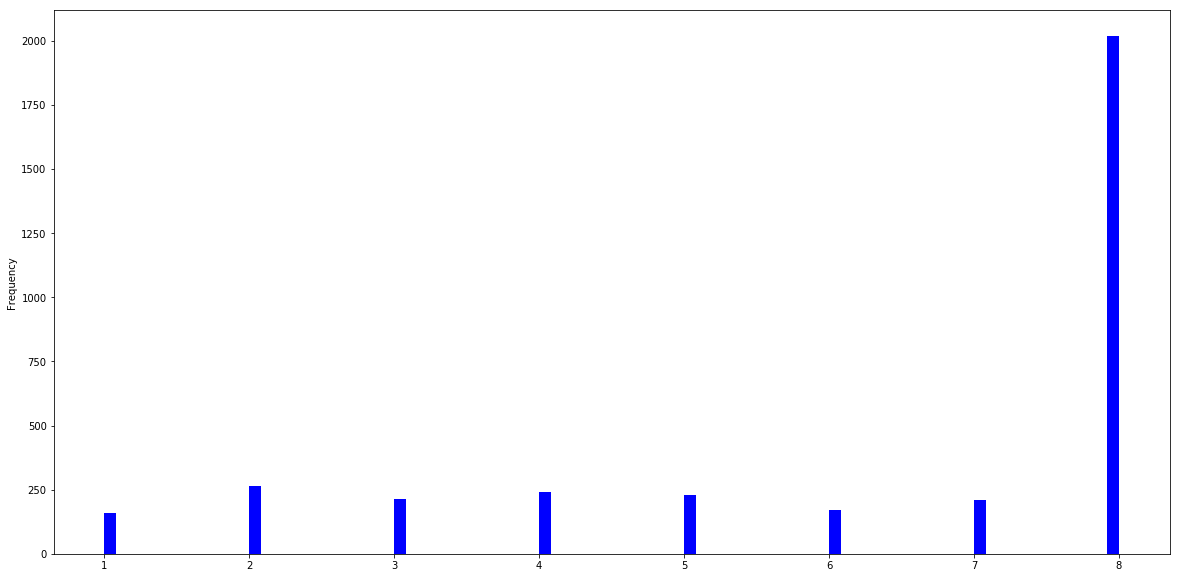

In [96]:
(info_df["port_no"]
     .groupby([
         info_df["port_no"],
     ])
     .count()
     .plot(kind="hist",
           bins = 84,
           color = 'b',
           figsize=(20,10)))

## Take only the end of the year observation per fund

In [64]:
info_df = info_df.reset_index(drop = True)

In [90]:
index = (info_df
     .assign(year = info_df["report_dt"].dt.year)
     .groupby(['port_no','year'])
     [['port_no','report_dt']]
     .tail(1)
     .index)

In [93]:
info_df = info_df.loc[index]

## Distribution by lipper_class

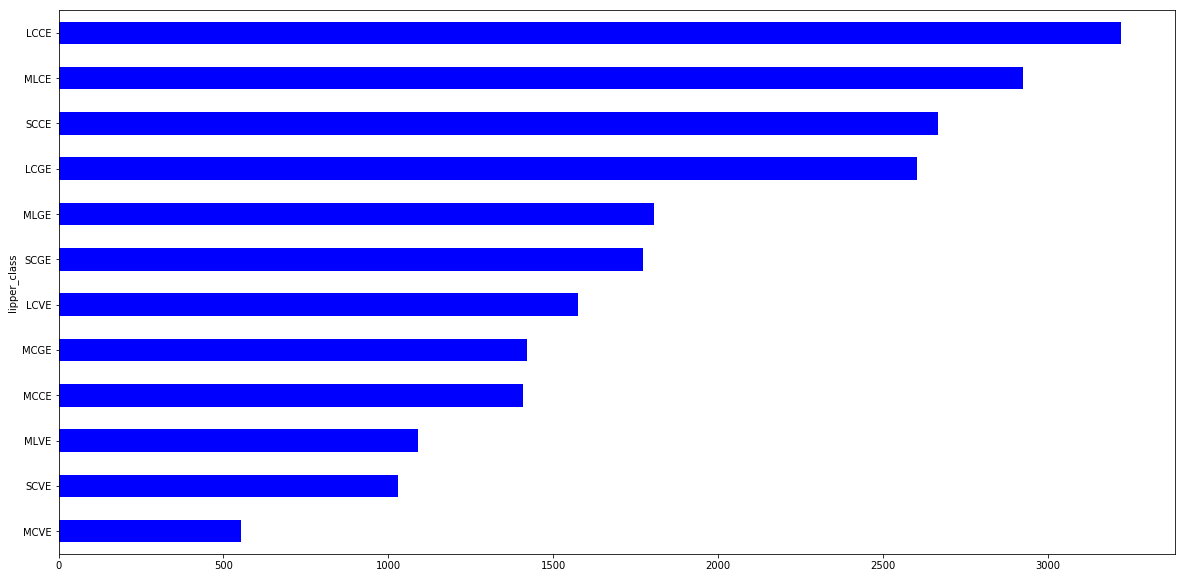

In [94]:
(info_df["port_no"]
     .groupby([
         info_df["lipper_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

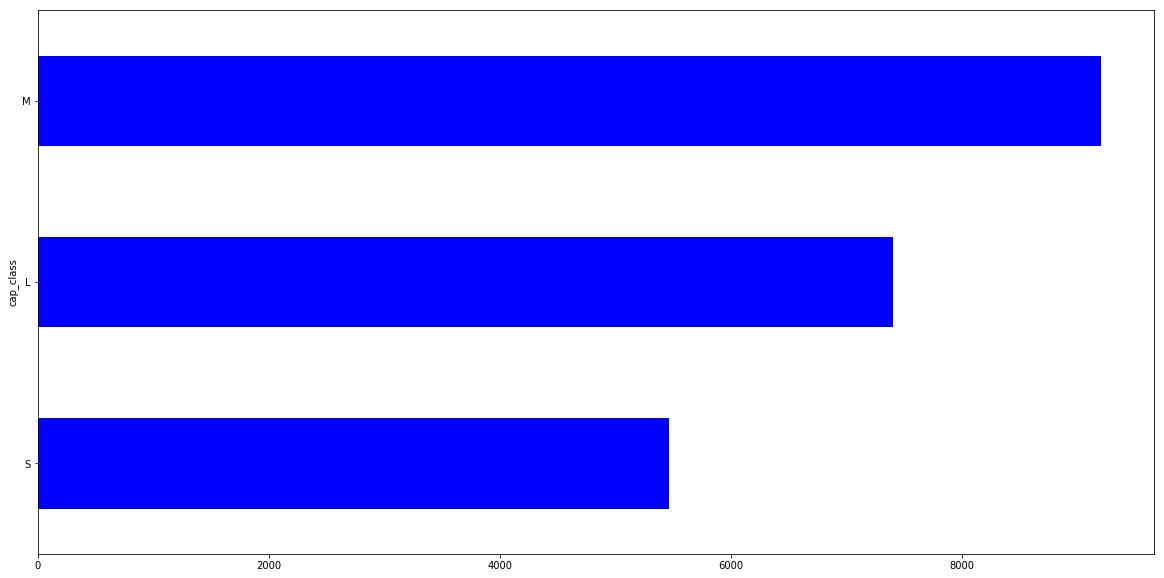

In [97]:
(info_df["port_no"]
     .groupby([
         info_df["cap_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

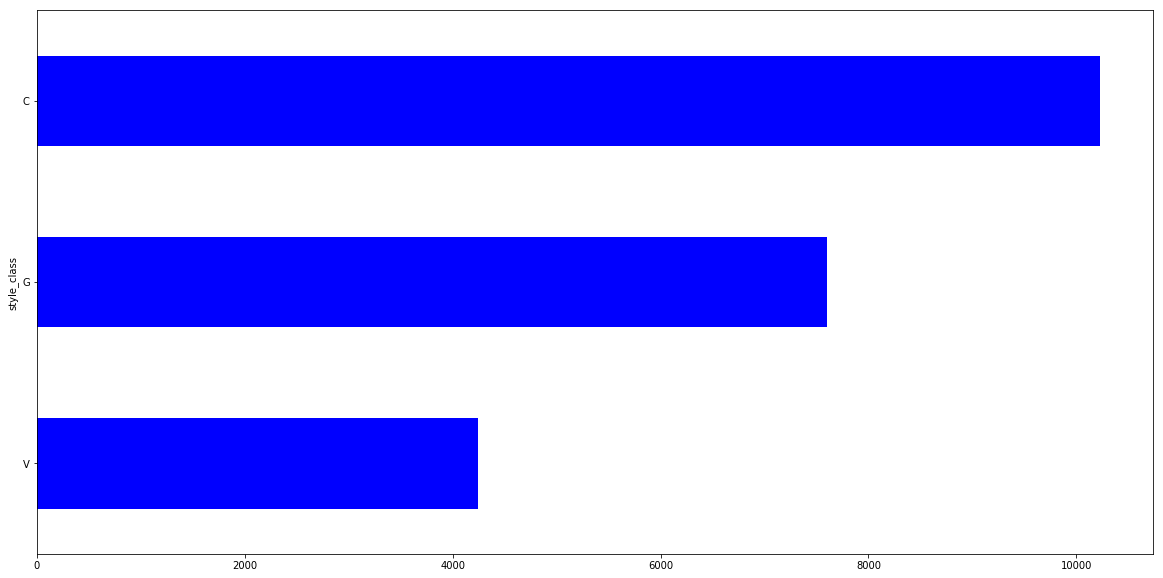

In [98]:
(info_df["port_no"]
     .groupby([
         info_df["style_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

### Histogram of average percentage of common stock (over complete period)
Maybe low and high values should be filtered out

(array([8.3000e+01, 1.2000e+01, 0.0000e+00, 0.0000e+00, 3.5000e+01,
        6.1000e+01, 8.2000e+01, 1.5200e+02, 2.1300e+02, 3.4900e+02,
        8.9900e+02, 3.1190e+03, 1.5434e+04, 1.6070e+03, 2.0000e+01,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([  0.    ,   7.5345,  15.069 ,  22.6035,  30.138 ,  37.6725,
         45.207 ,  52.7415,  60.276 ,  67.8105,  75.345 ,  82.8795,
         90.414 ,  97.9485, 105.483 , 113.0175, 120.552 , 128.0865,
        135.621 , 143.1555, 150.69  ]),
 <a list of 20 Patch objects>)

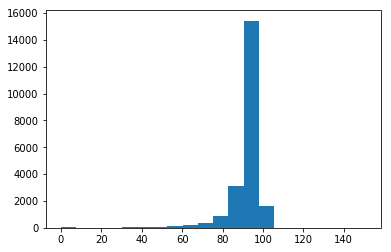

In [103]:
plt.hist(
    info_df['avrcs'],
    bins = 20
)

In [100]:
info_df.avrcs.describe()

count    22076.000000
mean        91.633520
std          9.916908
min          0.000000
25%         90.975128
50%         94.041064
75%         96.246970
max        150.690000
Name: avrcs, dtype: float64

## How often do lipper_classes change?


In [104]:
plt.rc('font', size=20)          # controls default text sizes

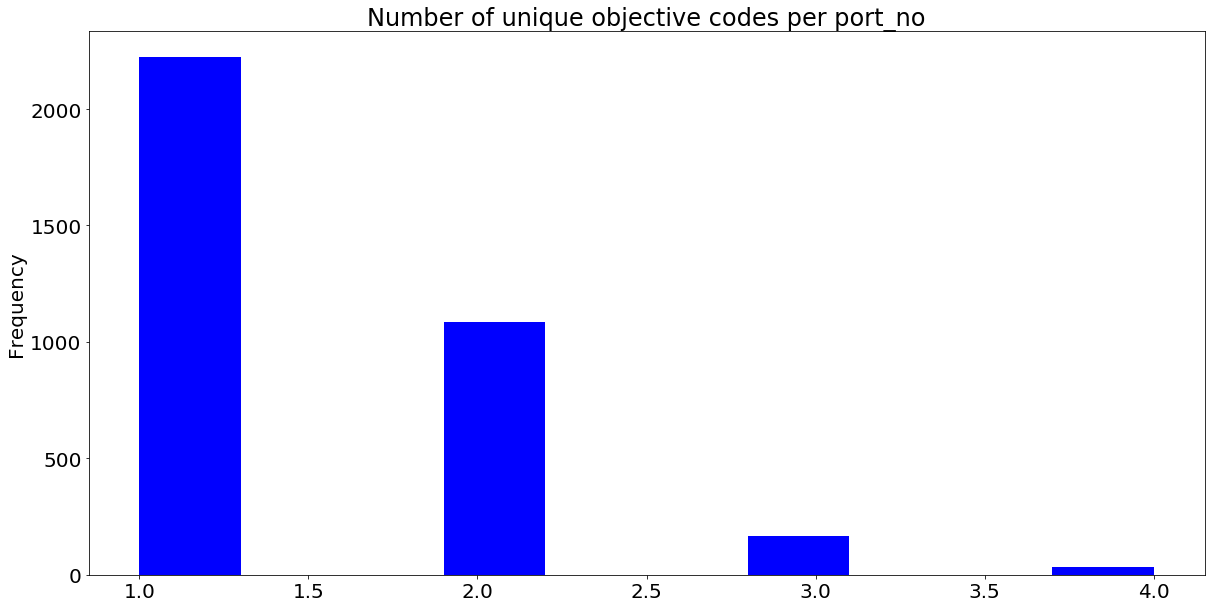

In [105]:
obj_per_portno = info_df[['port_no','lipper_class']]
ax = (obj_per_portno["lipper_class"]
    .groupby([
        obj_per_portno["port_no"]
    ])
    .nunique()
    .sort_values()
    .plot(kind="hist",
          color = 'b',
          bins = 10,
          figsize=(20,10),
          title='Number of unique objective codes per port_no')
)

In [106]:
lagged_class = info_df[['port_no','report_dt','lipper_class']]

lagged_class = lagged_class.assign(lag_lipper_class = lagged_class.lipper_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'port_no').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

round(pd.crosstab(lagged_class.lipper_class, lagged_class.lag_lipper_class, normalize = 'all') * 100,2)

lag_lipper_class,LCCE,LCGE,LCVE,MCCE,MCGE,MCVE,MLCE,MLGE,MLVE,SCCE,SCGE,SCVE
lipper_class,,,,,,,,,,,,
LCCE,13.39,0.25,0.32,0.00,0.00,0.00,0.46,0.07,0.04,0.00,0.00,0.00
LCGE,0.19,11.05,0.00,0.00,0.00,0.00,0.03,0.38,0.00,0.00,0.00,0.00
LCVE,0.50,0.01,6.32,0.01,0.00,0.00,0.08,0.01,0.23,0.00,0.00,0.00
MCCE,0.01,0.00,0.00,5.42,0.18,0.33,0.25,0.04,0.06,0.11,0.00,0.02
MCGE,0.00,0.00,0.00,0.19,5.80,0.00,0.01,0.29,0.00,0.01,0.10,0.00
MCVE,0.00,0.00,0.00,0.30,0.01,1.97,0.06,0.00,0.08,0.02,0.00,0.06
MLCE,0.55,0.07,0.06,0.22,0.03,0.06,11.39,0.36,0.36,0.00,0.00,0.01
MLGE,0.03,0.53,0.01,0.02,0.33,0.00,0.38,6.94,0.01,0.01,0.01,0.00
MLVE,0.05,0.01,0.39,0.05,0.00,0.09,0.33,0.02,4.00,0.00,0.00,0.00


In [107]:
lagged_class = info_df[['port_no','report_dt','style_class']]

lagged_class = lagged_class.assign(lag_style_class = lagged_class.style_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'port_no').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

pd.crosstab(lagged_class.style_class, lagged_class.lag_style_class)

lag_style_class,C,G,V
style_class,,,
C,8009,244,345
G,221,6171,5
V,347,9,3217


In [108]:
lagged_class = info_df[['port_no','report_dt','cap_class']]

lagged_class = lagged_class.assign(lag_cap_class = lagged_class.cap_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'port_no').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

In [109]:
round(pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True, normalize= 'all') *100,2)

lag_cap_class,L,M,S,All
cap_class,,,,
L,32.02,1.30,0.00,33.33
M,1.71,39.56,0.33,41.61
S,0.01,0.50,24.56,25.06
All,33.74,41.37,24.89,100.00


In [110]:
pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True)

lag_cap_class,L,M,S,All
cap_class,,,,
L,5946,242,0,6188
M,318,7346,62,7726
S,1,93,4560,4654
All,6265,7681,4622,18568


### Check importance of port_no map

In [111]:
path = '../data/raw/portno_map.feather'
portno_map = feather.read_dataframe(path)

In [112]:
check = portno_map.groupby(['crsp_fundno','crsp_portno']).count()['begdt']

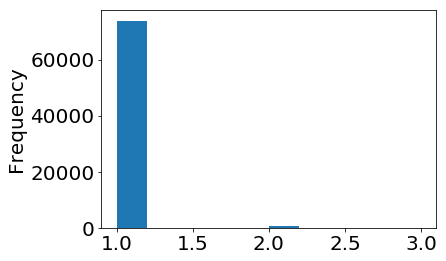

In [113]:
check.plot(kind = 'hist')

#### Only minimal importnace -> however should be implemented later

In [114]:
info_df['fund_name'].unique()

array(['AIM Sector Funds (Invesco Sector Funds): Invesco Comstock Fund; Class A Shares',
       'Seligman Capital Fund, Inc; Class R4 Shares',
       'Seligman Frontier Fund, Inc; Class R3 Shares', ...,
       'Northern Lights Fund Trust III: HCM Tactical Growth Fund; Class A Shares',
       'Lincoln Variable Insurance Products Trust: LVIP SSgA Mid-Cap Index Fund; Standard Class',
       'Starboard Investment Trust: Sirius S&P Strategic Large-Cap Allocation Fund'],
      dtype=object)

In [135]:
info_df.loc[info_df['fund_name'].astype(str).str.contains('T Rowe Price Institutional Large-Cap Core Growth Fund'),'fund_name']

104257    T Rowe Price Institutional Equity Funds, Inc: ...
104261    T Rowe Price Institutional Equity Funds, Inc: ...
104265    T Rowe Price Institutional Equity Funds, Inc: ...
104269    T Rowe Price Institutional Equity Funds, Inc: ...
104273    T Rowe Price Institutional Equity Funds, Inc: ...
104277    T Rowe Price Institutional Equity Funds, Inc: ...
104281    T Rowe Price Institutional Equity Funds, Inc: ...
104285    T Rowe Price Institutional Equity Funds, Inc: ...
Name: fund_name, dtype: object

In [137]:
info_df.loc[104285]

port_no                                                   1026915
report_dt                                     2017-12-31 00:00:00
fund_name       T Rowe Price Institutional Equity Funds, Inc: ...
avrcs                                                      95.684
lipper_class                                                 LCGE
False                                                        LCVE
cap_class                                                       L
style_class                                                     G
fund_no                                                     16296
Name: 104285, dtype: object